# Demo of errors made by FaceNet
Beforehand, all the 1000 test pairs has been went through by FaceNet and the distances calculated are stored in a json file. In this notebook, some errors, including *false reject* and *false accept*, are randomly selected and shown.

In [39]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import math
import copy
import json
import random

As calculated in *2 - Test.ipynb*, the optimal threshold for FaceNet is 3.91.

In [40]:
THRESHOLD = 3.91
ROOT = '../input/lfwaligned/test2/test2'

**Trace all the poor predictions by reading the json file prepared beforehand.**<br>
The indexes smaller than 500 (the 102nd index) are indexes for *false reject*, and those larger than 500 are indexes for *false accept*.

In [41]:
test = json.load(open('../input/lfwaligned/compare.json'))
distances, labels = np.array(test['embedding'][0]), np.array(test['embedding'][1])
preds = (distances < THRESHOLD)
falses = np.where(preds != labels)[0]
print(len(falses))
print(falses)

255
[  0   1   2   3  12  16  18  19  20  21  25  29  41  44  49  55  58  59
  66  80  83  85  88  94 107 114 115 126 128 133 134 135 139 142 147 151
 165 166 177 178 179 181 182 186 188 189 197 202 204 214 222 249 252 253
 254 255 258 265 268 276 279 280 281 285 286 293 301 302 305 307 311 315
 316 317 325 327 329 331 333 334 336 339 344 351 356 358 364 386 402 425
 429 430 441 444 455 461 464 467 468 480 481 495 500 501 504 506 508 512
 516 520 528 531 535 536 538 539 542 543 544 552 555 556 566 567 568 581
 591 593 596 597 599 600 603 608 615 618 621 624 625 626 627 629 633 636
 638 645 649 650 653 654 656 670 676 677 680 682 683 685 704 707 711 713
 714 716 719 721 722 724 727 728 730 734 736 739 742 747 755 756 758 763
 765 768 769 773 779 782 783 784 790 793 794 799 800 802 805 809 810 813
 817 820 825 826 827 831 835 837 842 843 845 851 854 856 857 861 862 863
 865 867 870 876 883 884 895 899 904 907 910 911 912 916 923 924 927 928
 940 942 943 949 953 955 959 960 964 968 970 97

In [42]:
def Testset():
    result = []
    file = open('../input/lfwaligned/pairsDevTest.txt')
    lines = file.readlines()

    for count,line in enumerate(lines):
        line = line.strip().split()

        if len(line)==1:
            continue

        elif len(line)==3:
            label = 1
            img1, id1, id2 = line
            img2 = img1
            img1_full = img1 + '_' + ('000'+ id1)[-4:] + '.jpg'
            img2_full = img2 + '_' + ('000'+ id2)[-4:] + '.jpg'

        elif len(line)==4:
            label = 0
            img1, id1, img2, id2 = line
            img1_full = img1 + '_' + ('000'+ id1)[-4:] + '.jpg'
            img2_full = img2 + '_' + ('000'+ id2)[-4:] + '.jpg'

        result.append([img1_full,img2_full,img1,img2,label])
    return result

## False reject

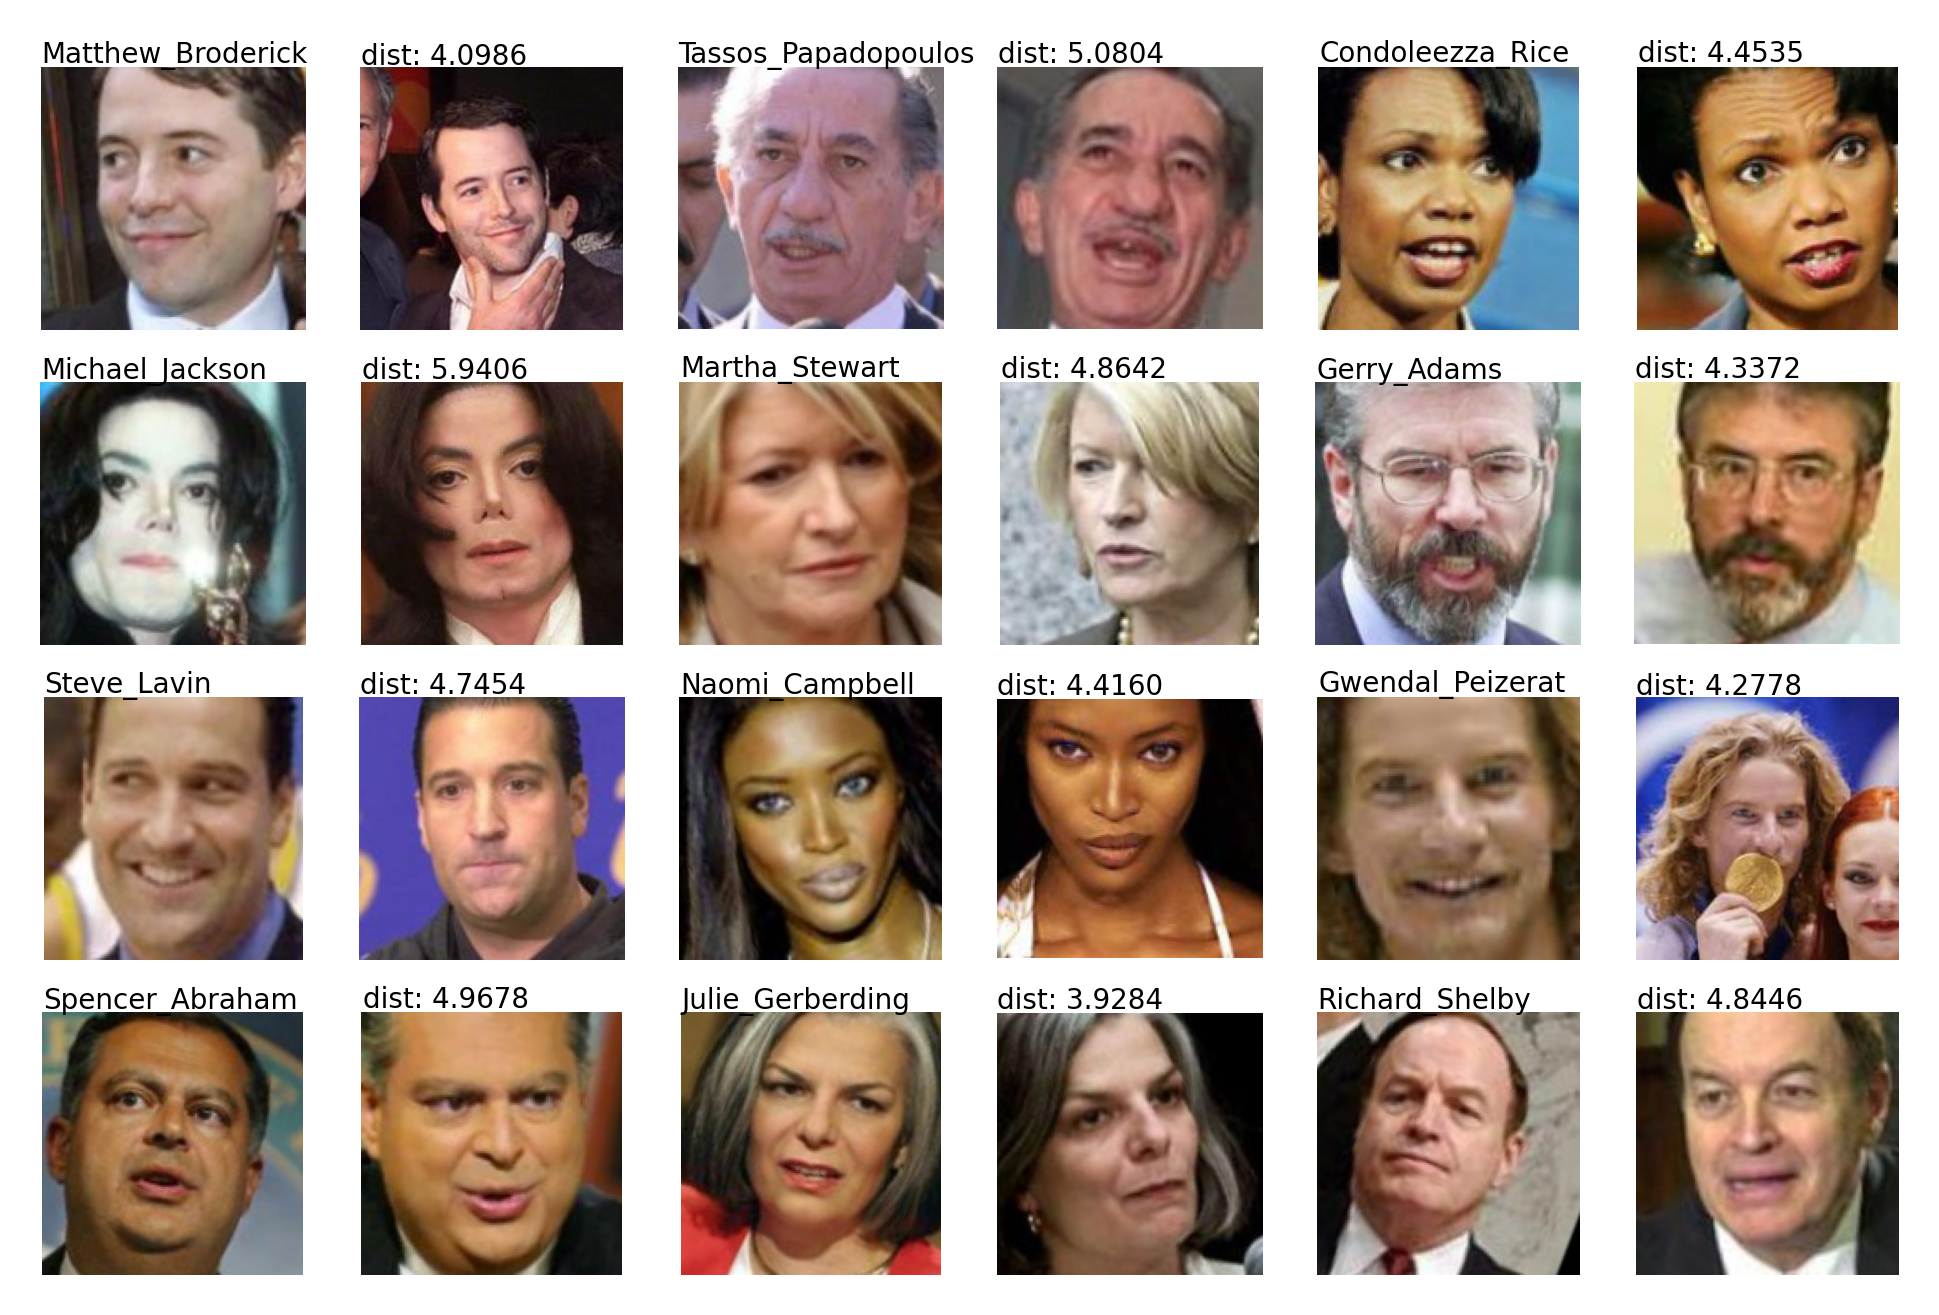

In [45]:
num_pic = 12
testset = Testset()
indexes = random.sample(list(falses)[:102], num_pic)
fig, ax = plt.subplots(num_pic//3,6,dpi = 400, figsize=(6,num_pic//3))

for i in range(0,len(indexes),3):
    idx = indexes[i]
    j = i//3
    img1_full,img2_full,img1,img2,label = testset[idx]
    dist = distances[idx]
    img1_f = Image.open(os.path.join(ROOT,img1_full))
    img2_f = Image.open(os.path.join(ROOT,img2_full))
    
    ax[j,0].imshow(img1_f)
    ax[j,1].imshow(img2_f)
    ax[j,0].text(0,-3,img1,fontsize=5)
    ax[j,1].text(0,-3,'dist: {:.4f}'.format(dist),fontsize=5)
    
    
    idx = indexes[i+1]
    img1_full,img2_full,img1,img2,label = testset[idx]
    dist = distances[idx]
    img1_f = Image.open(os.path.join(ROOT,img1_full))
    img2_f = Image.open(os.path.join(ROOT,img2_full))
    
    ax[j,2].imshow(img1_f)
    ax[j,3].imshow(img2_f)
    ax[j,2].text(0,-3,img1,fontsize=5)
    ax[j,3].text(0,-3,'dist: {:.4f}'.format(dist),fontsize=5)
    
    
    idx = indexes[i+2]
    img1_full,img2_full,img1,img2,label = testset[idx]
    dist = distances[idx]
    img1_f = Image.open(os.path.join(ROOT,img1_full))
    img2_f = Image.open(os.path.join(ROOT,img2_full))
    
    ax[j,4].imshow(img1_f)
    ax[j,5].imshow(img2_f)
    ax[j,4].text(0,-3,img1,fontsize=5)
    ax[j,5].text(0,-3,'dist: {:.4f}'.format(dist),fontsize=5)
    
    
for axes in ax.ravel():
    axes.axis('off')
fig.show()

## False accept

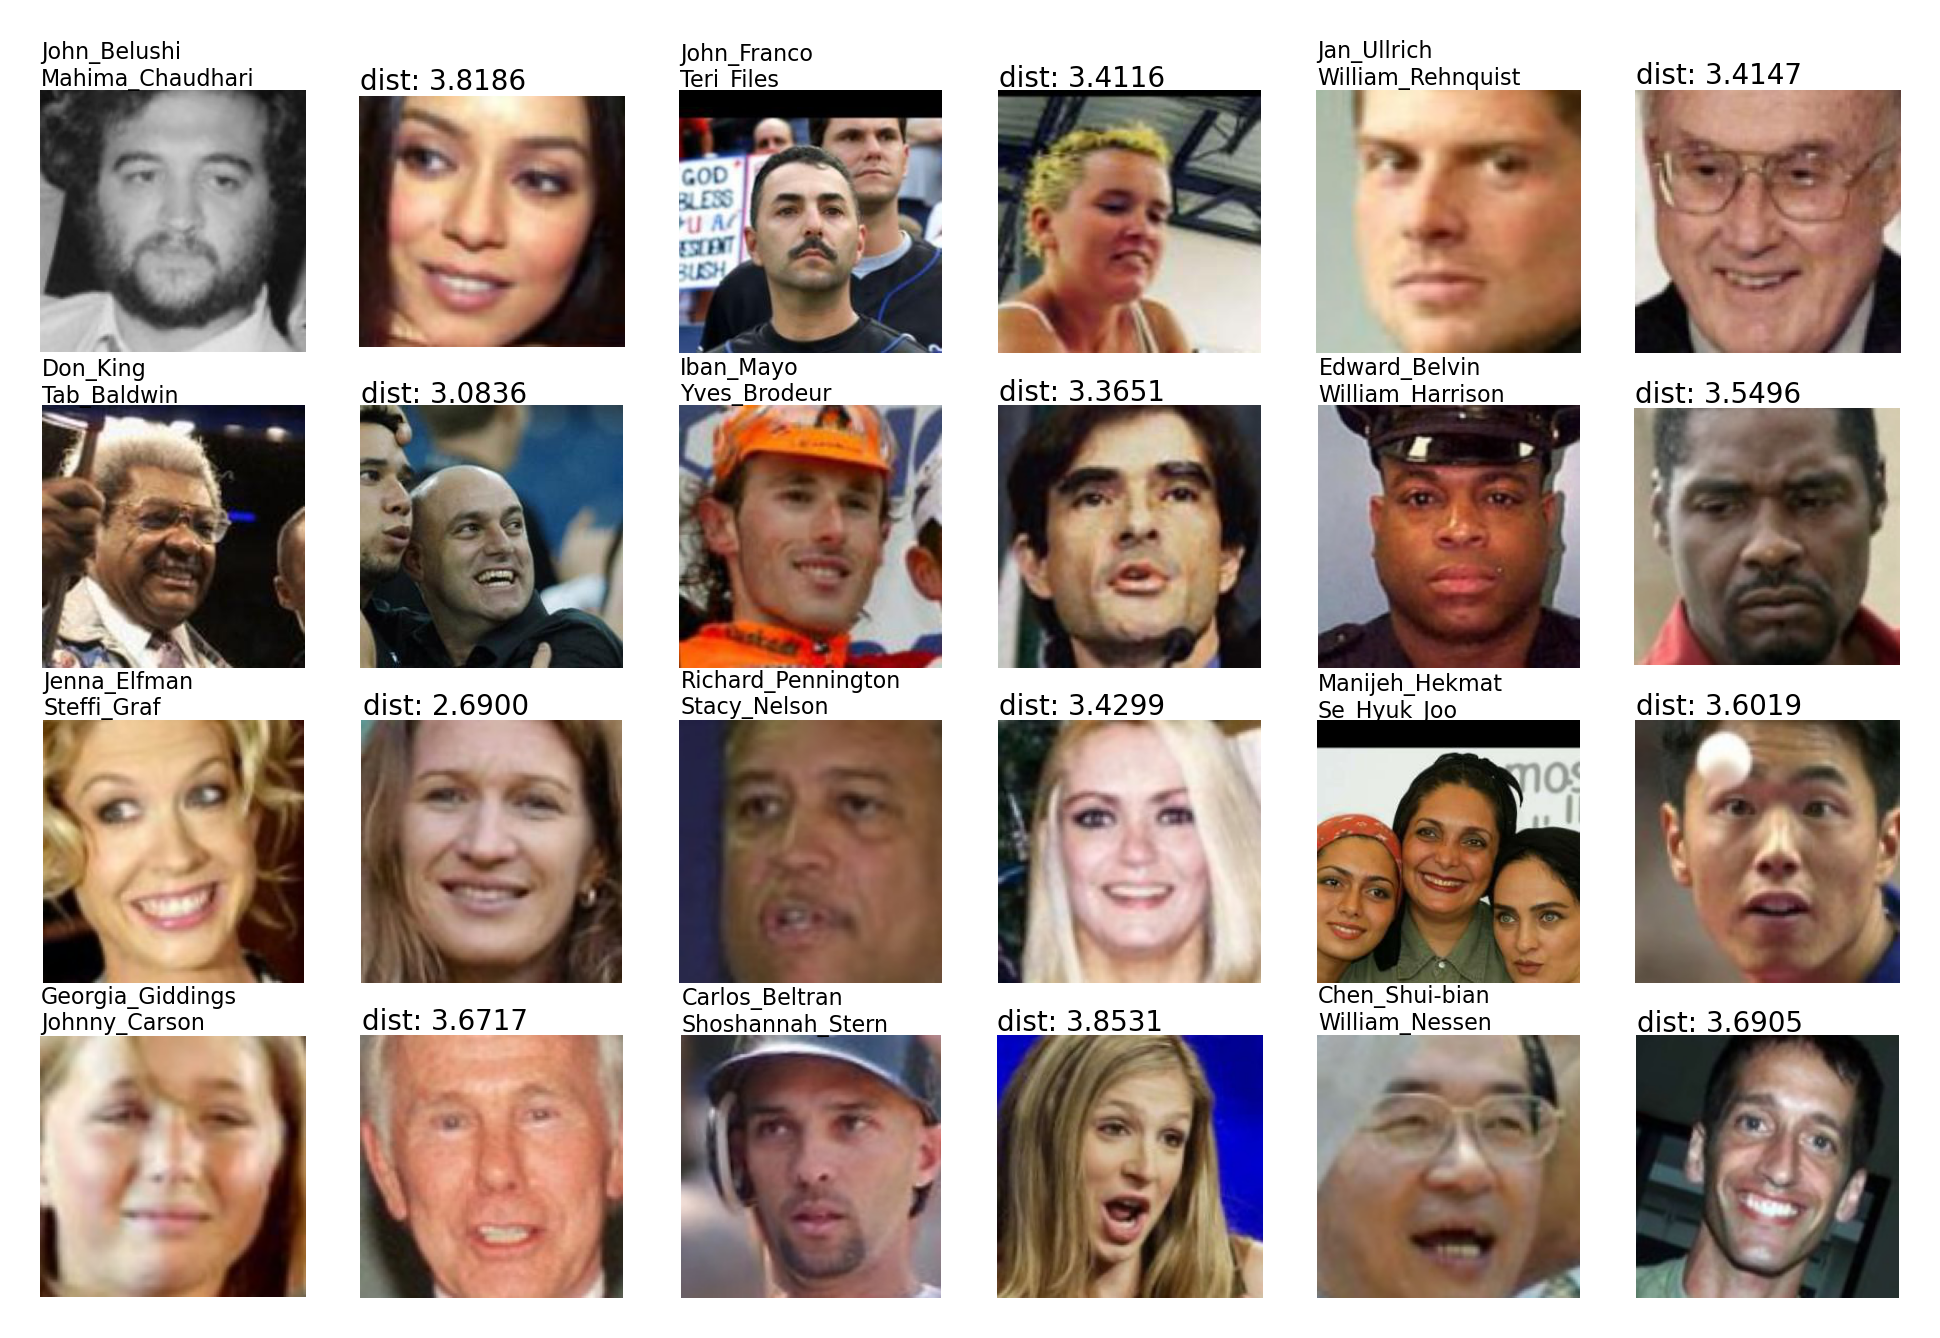

In [46]:
num_pic = 12
testset = Testset()
indexes = random.sample(list(falses)[102:], num_pic)
fig, ax = plt.subplots(num_pic//3,6,dpi = 400, figsize=(6,num_pic//3))

for i in range(0,len(indexes),3):
    idx = indexes[i]
    j = i//3
    img1_full,img2_full,img1,img2,label = testset[idx]
    dist = distances[idx]
    img1_f = Image.open(os.path.join(ROOT,img1_full))
    img2_f = Image.open(os.path.join(ROOT,img2_full))
    
    ax[j,0].imshow(img1_f)
    ax[j,1].imshow(img2_f)
    ax[j,0].text(0,-3,img1+'\n'+img2,fontsize=4)
    ax[j,1].text(0,-3,'dist: {:.4f}'.format(dist),fontsize=5)
    
    
    idx = indexes[i+1]
    img1_full,img2_full,img1,img2,label = testset[idx]
    dist = distances[idx]
    img1_f = Image.open(os.path.join(ROOT,img1_full))
    img2_f = Image.open(os.path.join(ROOT,img2_full))
    
    ax[j,2].imshow(img1_f)
    ax[j,3].imshow(img2_f)
    ax[j,2].text(0,-3,img1+'\n'+img2,fontsize=4)
    ax[j,3].text(0,-3,'dist: {:.4f}'.format(dist),fontsize=5)
    
    
    idx = indexes[i+2]
    img1_full,img2_full,img1,img2,label = testset[idx]
    dist = distances[idx]
    img1_f = Image.open(os.path.join(ROOT,img1_full))
    img2_f = Image.open(os.path.join(ROOT,img2_full))
    
    ax[j,4].imshow(img1_f)
    ax[j,5].imshow(img2_f)
    ax[j,4].text(0,-3,img1+'\n'+img2,fontsize=4)
    ax[j,5].text(0,-3,'dist: {:.4f}'.format(dist),fontsize=5)
    
    
for axes in ax.ravel():
    axes.axis('off')
fig.show()